In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import statistics
%matplotlib inline

1. Загрузите файл HR.csv в pandas dataframe

In [8]:
df = pd.read_csv('hr.csv')

In [9]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
disc_list = [] 
cat_list = [] 
for _ in df.columns:
    if len(df[_].unique()) < 15:
        cat_list.append(_)
        print(_,df[_].unique(),'\n')
    else:
        disc_list.append(_)

number_project [2 5 7 6 4 3] 

time_spend_company [ 3  6  4  5  2  8 10  7] 

Work_accident [0 1] 

left [1 0] 

promotion_last_5years [0 1] 

sales ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 

salary ['low' 'medium' 'high'] 



In [16]:
df[cat_list].mode()

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,4,3,0,0,0,sales,low


3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.

In [17]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


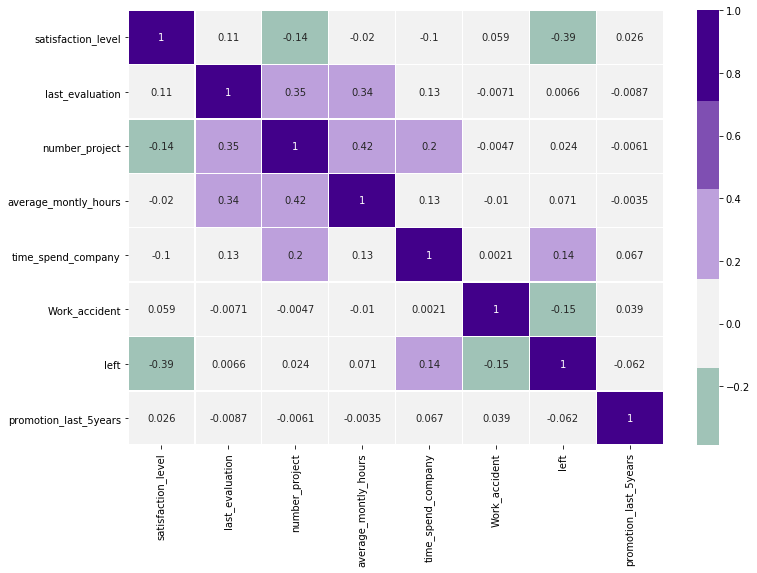

In [18]:
f, ax = plt.subplots(figsize=(12, 8))

cmap = sns.diverging_palette(150, 275, s=100, l=20, n=7)

sns.heatmap(corr, cmap=cmap, center=0, annot=True, linewidths=.5)

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [25]:
workring_list = df.query('left == 0')
workers_list = workring_list.groupby('sales').count()
workers_list.index.name = 'by_Deps'
print(f'Количество сотрудников \n{workers_list["salary"]}\n')

Количество сотрудников 
by_Deps
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: salary, dtype: int64



5. Показать распределение сотрудников по зарплатам.

low: 5144,      medium: 5129,      high: 1155


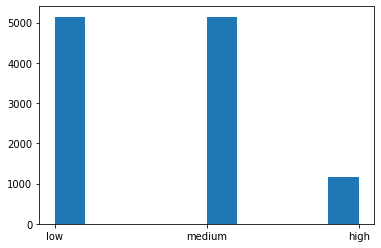

In [26]:
plt.hist(workring_list['salary'])
print(f'low: {workring_list[workring_list["salary"]=="low"]["salary"].count()},\
      medium: {workring_list[workring_list["salary"]=="medium"]["salary"].count()},\
      high: {workring_list[workring_list["salary"]=="high"]["salary"].count()}')

6.Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [27]:
total_s = pd.get_dummies(df['salary'], prefix = 'salary_')

In [28]:
total_s['deps'] = df.sales
total_s['left'] = df.left

In [29]:
working_now = total_s.query('left == 0').groupby('deps').sum()
del working_now['left']

no_working = total_s.query('left == 1').groupby('deps').sum()
del no_working['left']

total_workers = total_s.groupby('deps').sum()
del total_workers['left']

In [30]:
dep_list= list(total_workers.index)
dep_list.insert(0, 'x')
dep_list

['x',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

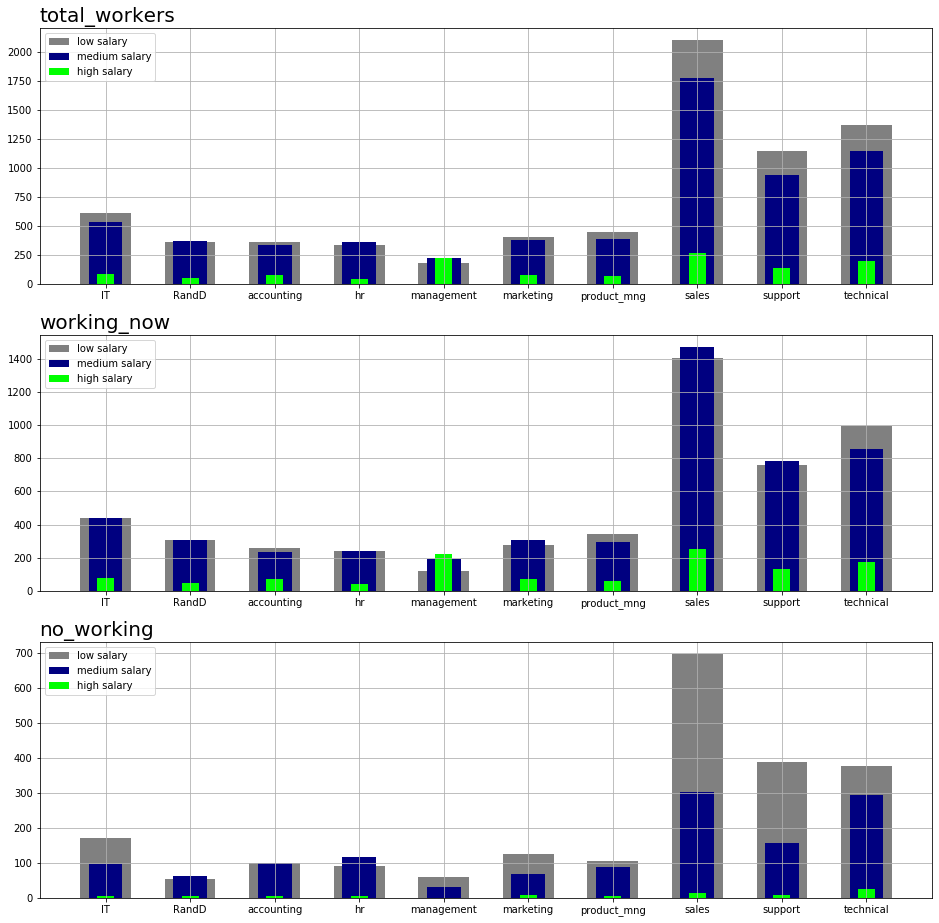

In [31]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(nrows = 3, ncols =1)

x = range(0,10)

   
ax[0].set_title('total_workers', fontsize=20, loc = 'left')
ax[1].set_title('working_now', fontsize=20, loc = 'left')
ax[2].set_title('no_working', fontsize=20, loc = 'left')
    
def make_hist(_, df):  
    ax[_].bar(x, df.salary__low, width = 0.6, color='grey', label='low salary')
    ax[_].bar(x, df.salary__medium, width = 0.4, color='navy', label='medium salary')
    ax[_].bar(x, df.salary__high, width = 0.2, color='lime', label='high salary')
    ax[_].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[_].set_xticklabels(dep_list)
    ax[_].legend(loc = 'upper left')
    ax[_].grid()

make_hist(0, total_workers)  
make_hist(1, working_now) 
make_hist(2, no_working) 

fig.set_figwidth(16)    
fig.set_figheight(16)   

plt.show()

7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом